In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

In [42]:
data = pd.read_excel('data_tbv.xlsx')
data.head()

,age,sex,province,req_date,is_bad,enc_id,enc_phone,mstcty,mst_encrypt,ngay_lap_re,...,biztime_monthly_calldayno_t12,biztime_monthly_callduration_t12,biztime_monthly_avgcallduration_t12,biztime_monthly_stdcallduration_t12,nighttime_monthly_nocontact_t12,nighttime_monthly_callno_t12,nighttime_monthly_calldayno_t12,nighttime_monthly_callduration_t12,nighttime_monthly_avgcallduration_t12,nighttime_monthly_stdcallduration_t12
0,40,Male,Đồng Tháp,2019-09-09,1,qbmB2FDS/T9dbZVD/b33wg==,AqDUrRqQB5VWNeCEjWz1xA==,AlcWPA988/SiJ6VzK0Y80Q==,NaN,2017-03-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32,Male,Hà Nội,2019-09-09,1,sKGZAxhjyO0nxQ9CrlZbSw==,X7sxKRS6+JpqHwBCxplySQ==,e2i08DAYVh3Ak1Tc1uGOeQ==,yJF35ZaZMOyKAlpmRy8+gQ==,2019-03-28,...,9.0,350.0,18.421053,12.125803,NaN,NaN,NaN,NaN,NaN,NaN
2,32,Male,Hà Nội,2019-09-09,1,Lert87J0SCGfce6PBkv0+w==,jJFZhFarLQ2XhQMRUYtwDg==,IMkcueFODYw8yBeIcrjfWw==,tl7HluUE2SMAxYKzUrAxfg==,2019-04-01,...,26.0,32849.0,23.977372,22.093273,12.0,22.0,12.0,2561.0,116.409091,163.256345
3,32,Female,Hà Nội,2019-09-09,1,SbtEwTlwz6kOJtnjtxDZ7A==,0Bol+Ib1xGA8xQUqb43Uyg==,9GTjGMqAROx0QDqSwSNRuw==,cTHkX9GiFDiX+gGjBjbcvQ==,2015-04-17,...,28.0,13066.0,123.264151,245.821240,1.0,3.0,1.0,234.0,78.000000,44.136153
4,32,Male,Phú Thọ,2019-09-08,1,gyoBkm/XqdHcd0hl5NScQw==,S9kop0jGn49mxYh+Sst1uQ==,Eq7QA7qXbUj0MSCIxQ5pZA==,0bMQgBJeWrfKNgQb68SJ+w==,2018-03-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# calculate time active for phone number
data.kich_hoat = pd.to_datetime(data.kich_hoat.astype(str), format='%Y%m%d')
data['mobileno_timeactive'] = (data.req_date - data.kich_hoat)/np.timedelta64(1,'D')

# com_activeyear
data['com_startyear'].replace({0: np.nan}, inplace=True)
data['com_taxyear'].replace({0: np.nan}, inplace=True)
data['com_activeyear'] = data.req_date.apply(lambda x: x.year) - data.com_startyear
data['com_taxingyear'] = data.req_date.apply(lambda x: x.year) - data.com_taxyear

data.loc[data.com_activeyear < 0,'com_activeyear'] = np.nan
data.loc[data.com_taxingyear < 0,'com_taxingyear'] = np.nan


print(data.shape)
redundant_cols = ['enc_id','enc_phone','mstcty','mst_encrypt','msisdn','req_date','ngay_lap_re','app_year','tax_year',
                  'owner_card_issu','owner_regi_date','kich_hoat','com_startyear','com_taxyear','com_active']
data.drop(columns=redundant_cols, inplace=True)
print(data.shape)

(24484, 331)
(24484, 316)


In [44]:
# take records with last updated tax within 1 year prior to request date
data = data[data.t_year <= 1]
data.shape

(22080, 316)

In [45]:
# count_missing
missing_thres = 0.25
missing_percent = (data.isna().sum()/data.shape[0])
missing_percent.head()
varlist = missing_percent[missing_percent <= missing_thres].index.tolist()
varlist

['age',
 'sex',
 'province',
 'is_bad',
 't_year',
 't_month',
 'tongthunhap_y1',
 'taxemployer_1y',
 'taxemployer_2y',
 'nodeclaration_y1',
 'no_dependon',
 'com_business',
 'com_size',
 'com_province',
 'quan_huyen',
 'tinh_thanh_pho',
 'acc_type',
 'tong_tien_t1',
 'tien_cam_ket_va_vas_t1',
 'tien_cuoc_goi_t1',
 'tien_cuoc_tin_nhan_t1',
 'so_giay_goi_t1',
 'so_tin_nhan_t1',
 'tong_tien_t2',
 'tien_cam_ket_va_vas_t2',
 'tien_cuoc_goi_t2',
 'tien_cuoc_tin_nhan_t2',
 'so_giay_goi_t2',
 'so_tin_nhan_t2',
 'overall_monthly_nocontact_t3',
 'overall_monthly_callno_t3',
 'overall_monthly_calldayno_t3',
 'overall_monthly_callduration_t3',
 'overall_monthly_avgcallduration_t3',
 'overall_monthly_stdcallduration_t3',
 'biztime_monthly_nocontact_t3',
 'biztime_monthly_callno_t3',
 'biztime_monthly_calldayno_t3',
 'biztime_monthly_callduration_t3',
 'biztime_monthly_avgcallduration_t3',
 'biztime_monthly_stdcallduration_t3',
 'mobileno_timeactive',
 'com_activeyear',
 'com_taxingyear']

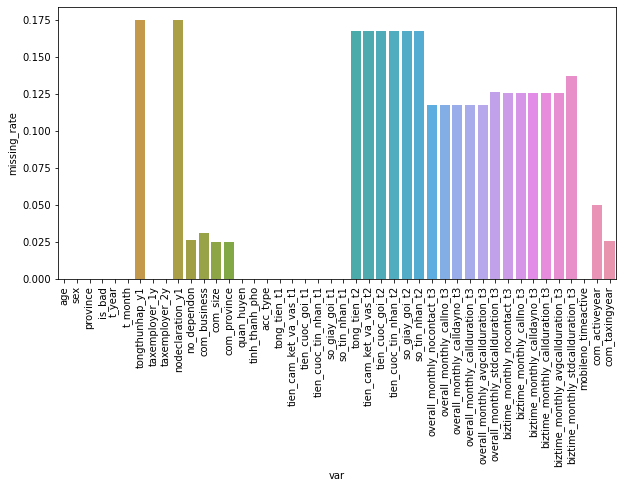

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=pd.DataFrame(missing_percent[varlist]).reset_index().set_axis(['var','missing_rate'], axis=1), x='var', y='missing_rate', orient='v', ax=ax)
ax.tick_params(axis='x', rotation=90)

In [47]:
data = data[varlist]

# impute missing value
def impute_missing(input_data):
    data = input_data
    # group of cols replaced missing with -1
    cols1 = ['tongthunhap_y1','nodeclaration_y1','com_size','com_activeyear','com_taxingyear']
    data[cols1] = data[cols1].fillna(-1)
    
    # group of cols replaced missing with 0
    cols2 = ['no_dependon'] + varlist[-27:-3]
    data[cols2] = data[cols2].fillna(0)
    
    # group of categorical cols replaced missing value with 'missing'
    cols3 = ['com_business','com_province']
    data[cols3] = data[cols3].fillna('missing')
    
    return data
    
data = impute_missing(data)

In [48]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

import unidecode

def normalize_province(x):
    name = unidecode.unidecode(x).lower().replace(' ','')
    
    format_dict = {'hanoi':['hn','tphn','tphanoi','thanhphohanoi','hanoi','hanoi(hni1)','hanoi(hni2)'],
                   'hochiminh':['tphochiminh','tphcm','hcm','hochiminh'],
                   'daklak':['daclac','daclak','daklac','daklak'],
                   'daknong':['dacnong','daknong'],
                   'vungtau':['bariavungtau','vungtau','brvt'],
                   'vinhphuc':['vinhphu','vinhp'],
                   'thuathienhue':['hue','thuathienhue'],
                   'backan':['backan','baccan']}
    
    for k,v in format_dict.items():
        if name in v:
            return k
    
    return name
    
def determine_economic_area(x):
    map_dict = {'trung du va mien nui phia bac':['hagiang','caobang','langson','bacgiang','phutho','thainguyen','backan','tuyenquang','laocai','yenbai','laichau','sonla','dienbien','hoabinh'],
                'dong bang song hong':['hanoi','haiphong','haiduong','hungyen','vinhphuc','bacninh','thaibinh','namdinh','hanam','ninhbinh','quangninh'],
                'bac trung bo va duyen hai mien trung':['thanhhoa','nghean','hatinh','quangbinh','quangtri','thuathienhue','danang','quangnam','quangngai','binhdinh','phuyen','khanhhoa','ninhthuan','binhthuan'],
                'tay nguyen':['kontum','gialai','daklak','daknong','lamdong'],
                'dong nam bo':['hochiminh','dongnai','vungtau','binhduong','binhphuoc','tayninh'],
                'dong bang song cuu long':['cantho','longan','tiengiang','bentre','travinh','vinhlong','angiang','dongthap','kiengiang','haugiang','soctrang','baclieu','camau']}
    for k, v in map_dict.items():
        if x in v:
            return k
    return 'missing'

In [49]:
data['com_province'] = data['com_province'].apply(lambda x: normalize_province(x))
data['tinh_thanh_pho'] = data['tinh_thanh_pho'].apply(lambda x: normalize_province(x))
data['compare_province'] = data['com_province'] == data['tinh_thanh_pho']
data['com_area'] = data['com_province'].apply(lambda x: determine_economic_area(x))
data['telco_area'] = data['tinh_thanh_pho'].apply(lambda x: determine_economic_area(x))
data.drop(columns=['com_province','tinh_thanh_pho','quan_huyen','com_business'], inplace=True)

In [50]:
data.columns

Index(['age', 'sex', 'province', 'is_bad', 't_year', 't_month',
       'tongthunhap_y1', 'taxemployer_1y', 'taxemployer_2y',
       'nodeclaration_y1', 'no_dependon', 'com_size', 'acc_type',
       'tong_tien_t1', 'tien_cam_ket_va_vas_t1', 'tien_cuoc_goi_t1',
       'tien_cuoc_tin_nhan_t1', 'so_giay_goi_t1', 'so_tin_nhan_t1',
       'tong_tien_t2', 'tien_cam_ket_va_vas_t2', 'tien_cuoc_goi_t2',
       'tien_cuoc_tin_nhan_t2', 'so_giay_goi_t2', 'so_tin_nhan_t2',
       'overall_monthly_nocontact_t3', 'overall_monthly_callno_t3',
       'overall_monthly_calldayno_t3', 'overall_monthly_callduration_t3',
       'overall_monthly_avgcallduration_t3',
       'overall_monthly_stdcallduration_t3', 'biztime_monthly_nocontact_t3',
       'biztime_monthly_callno_t3', 'biztime_monthly_calldayno_t3',
       'biztime_monthly_callduration_t3', 'biztime_monthly_avgcallduration_t3',
       'biztime_monthly_stdcallduration_t3', 'mobileno_timeactive',
       'com_activeyear', 'com_taxingyear', 'compare_pro

In [72]:
cat = data.columns[data.dtypes == 'O']
num = data.columns[data.dtypes != 'O']

In [74]:
num

Index(['age', 'is_bad', 't_year', 't_month', 'tongthunhap_y1',
       'taxemployer_1y', 'taxemployer_2y', 'nodeclaration_y1', 'no_dependon',
       'com_size', 'tong_tien_t1', 'tien_cam_ket_va_vas_t1',
       'tien_cuoc_goi_t1', 'tien_cuoc_tin_nhan_t1', 'so_giay_goi_t1',
       'so_tin_nhan_t1', 'tong_tien_t2', 'tien_cam_ket_va_vas_t2',
       'tien_cuoc_goi_t2', 'tien_cuoc_tin_nhan_t2', 'so_giay_goi_t2',
       'so_tin_nhan_t2', 'overall_monthly_nocontact_t3',
       'overall_monthly_callno_t3', 'overall_monthly_calldayno_t3',
       'overall_monthly_callduration_t3', 'overall_monthly_avgcallduration_t3',
       'overall_monthly_stdcallduration_t3', 'biztime_monthly_nocontact_t3',
       'biztime_monthly_callno_t3', 'biztime_monthly_calldayno_t3',
       'biztime_monthly_callduration_t3', 'biztime_monthly_avgcallduration_t3',
       'biztime_monthly_stdcallduration_t3', 'mobileno_timeactive',
       'com_activeyear', 'com_taxingyear', 'compare_province'],
      dtype='object')

In [103]:
def plots(feature, data):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(data.loc[data['is_bad']==0,feature],
                 kde = False, color = "#004a4d", norm_hist=False,
                 hist_kws = dict(alpha=0.8), bins=40,
                 label="Not Default", ax=ax1);
    sns.distplot(data.loc[data['is_bad']==1,feature],
                 kde = False, color = "#7d0101", norm_hist=False,
                 hist_kws = dict(alpha=0.6), bins=40,
                 label="Default Customer", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(data[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);
    
    ax1.legend(loc="upper right")

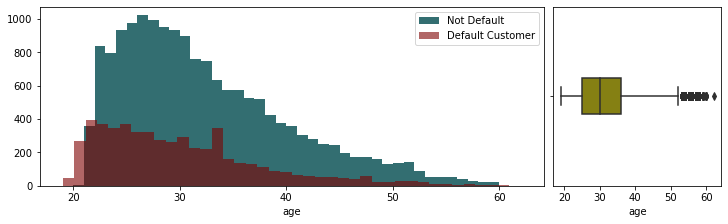

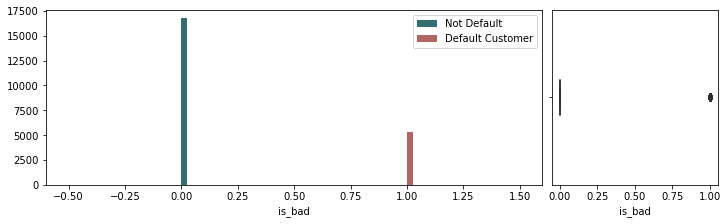

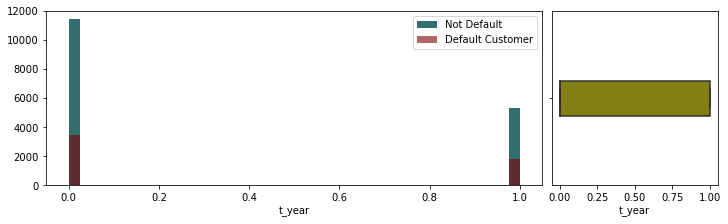

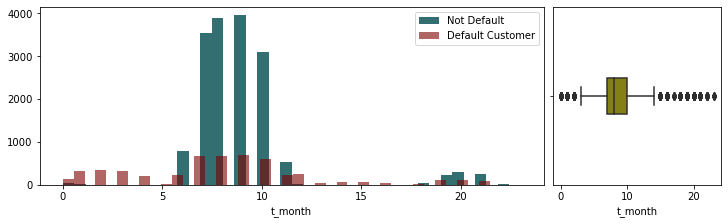

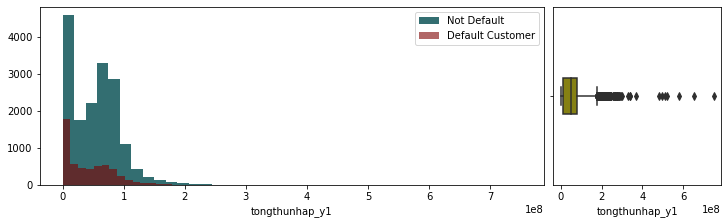

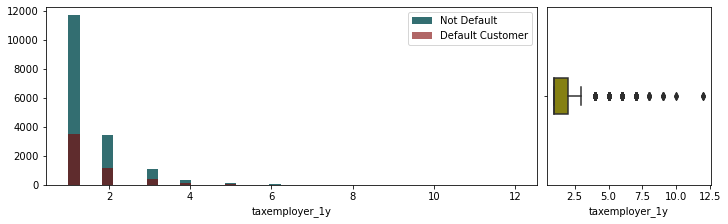

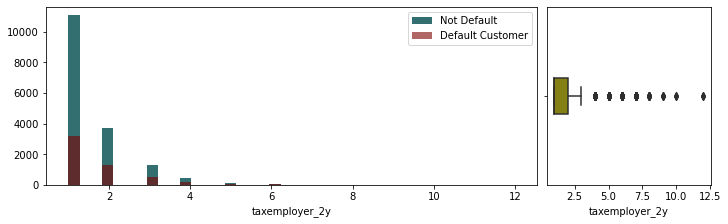

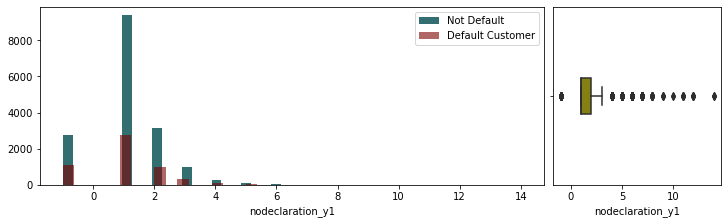

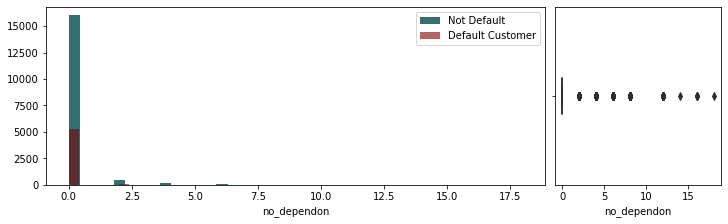

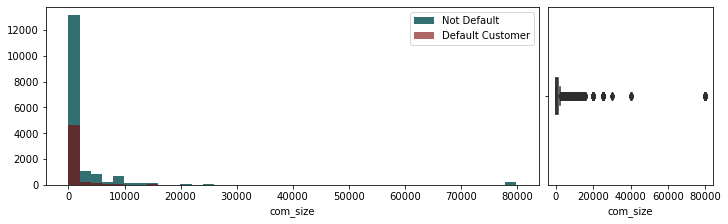

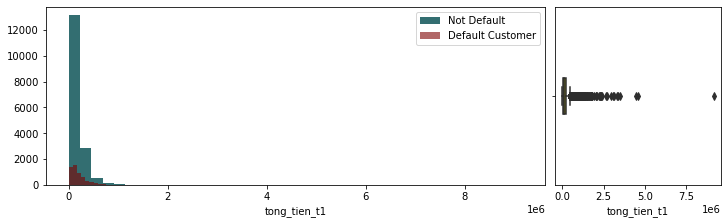

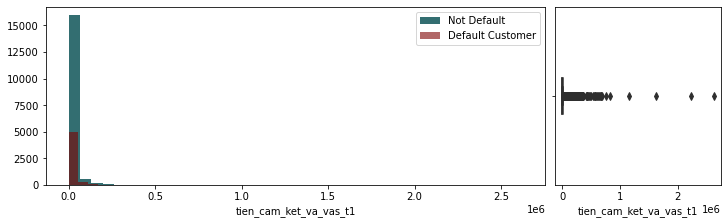

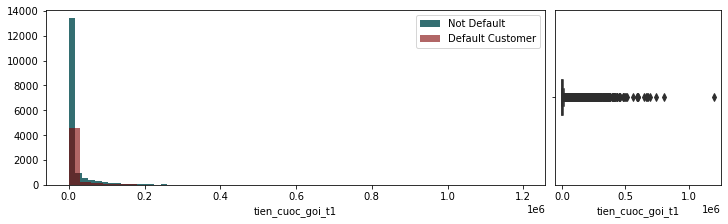

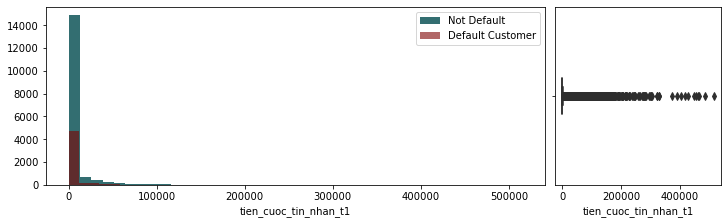

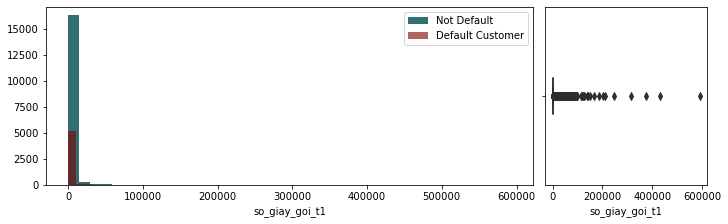

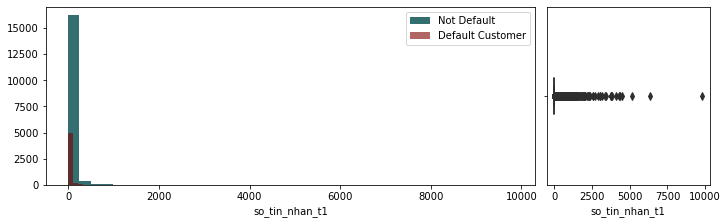

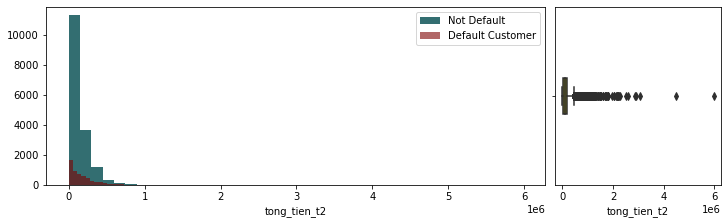

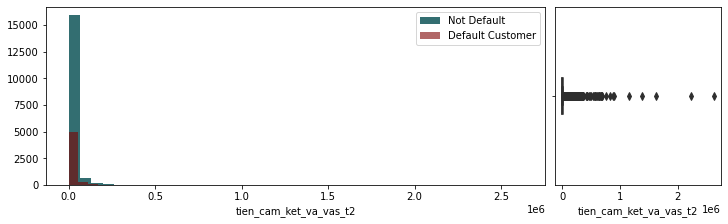

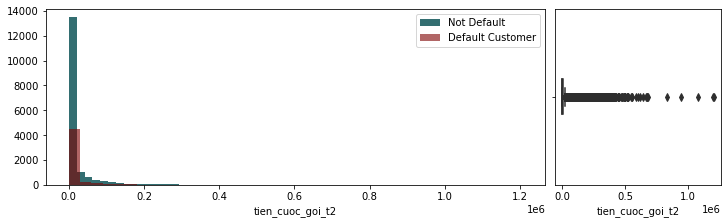

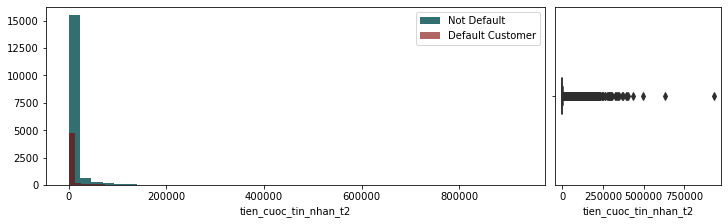

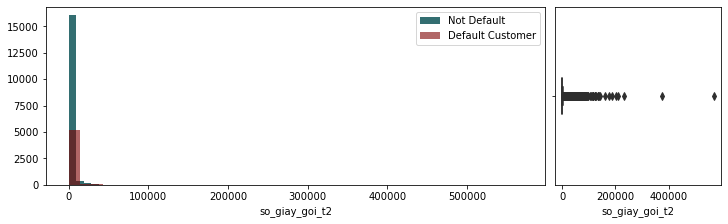

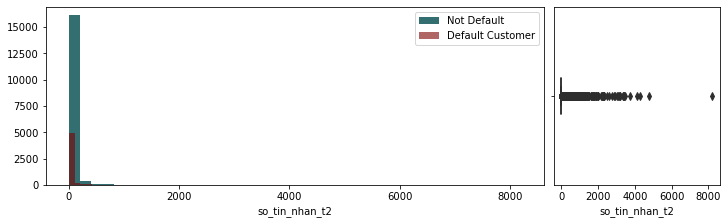

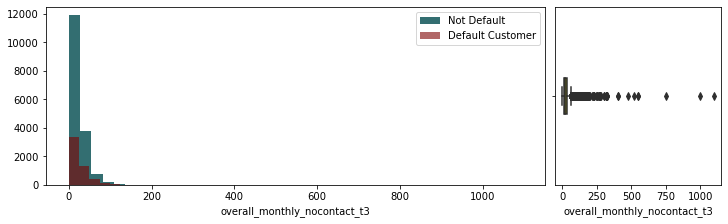

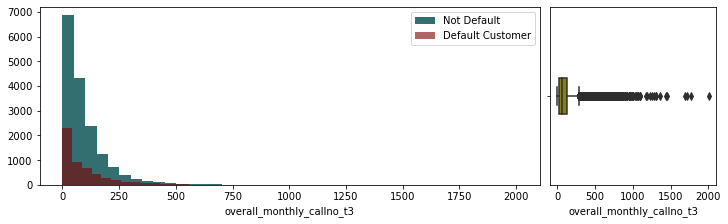

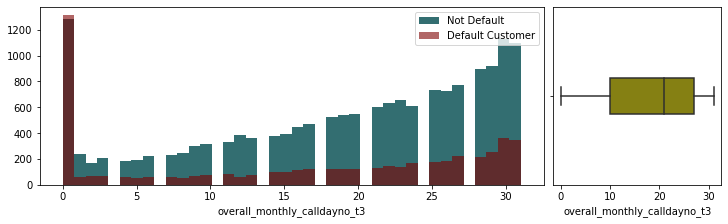

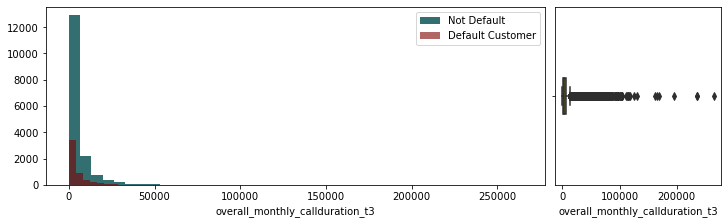

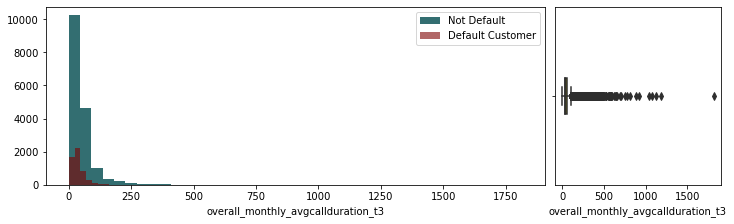

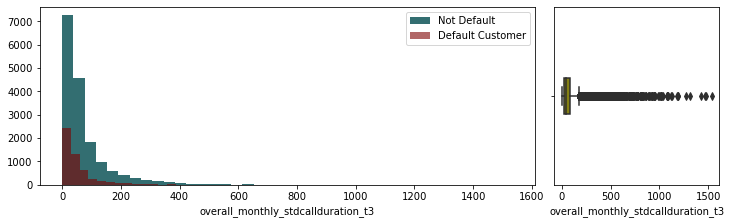

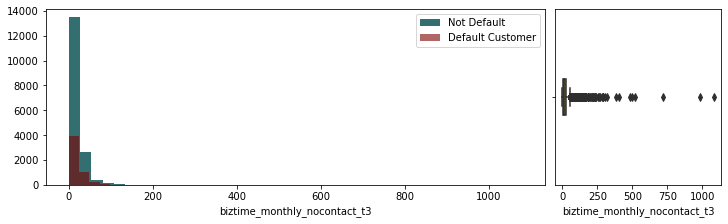

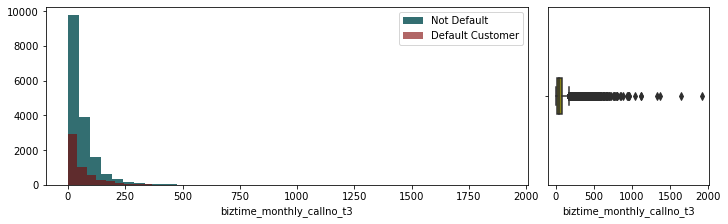

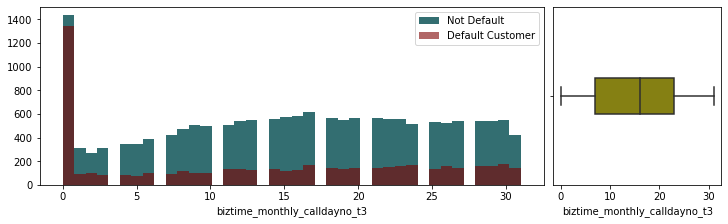

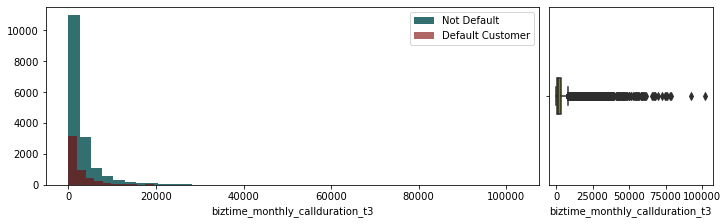

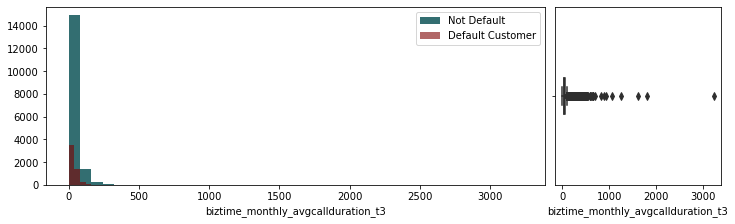

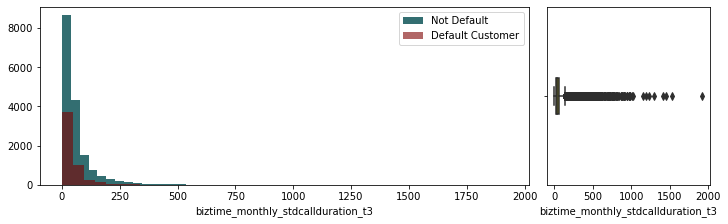

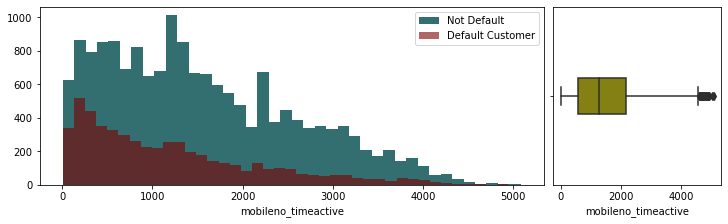

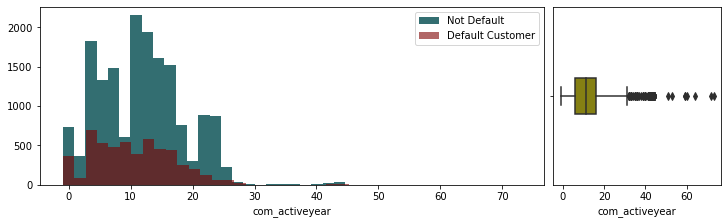

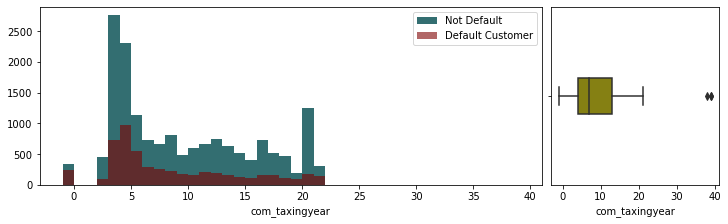

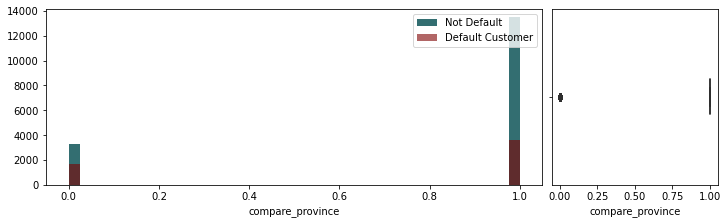

In [86]:
data['compare_province'] = data['compare_province'].astype(int)
for i in num:
    plots(i)

In [87]:
iv_df, iv = data_vars(data[cat], data['is_bad'])

In [95]:
transform_dict = {}
for i in cat:
    temp_dict = {}
    temp = iv_df.loc[iv_df.VAR_NAME == i].reset_index(drop=True)
    temp['value'] = temp.apply(lambda row: pd.Interval(row.MIN_VALUE, row.MAX_VALUE, closed='both') if pd.notna(row.MIN_VALUE) and (row.MIN_VALUE != row.MAX_VALUE) else row.MIN_VALUE , axis=1)
    for j in range(temp.shape[0]):
        temp_dict[temp.loc[j, 'value']] = temp.loc[j, 'WOE']
        
    transform_dict[i] = temp_dict
    
def mutate(x, mutate_dict):
    for k, v in mutate_dict.items():
        if isinstance(k, pd.Interval):
            if x in k:
                return v
        else:
            if (pd.isna(x) and pd.isna(k)):
                return v
            elif x == k:
                return v

In [97]:
for k,v in transform_dict.items():
    data[k] = data[k].apply(lambda x: mutate(x, v))

In [100]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [101]:
a = pd.DataFrame(sc.fit_transform(data[cat]), columns=cat)

In [106]:
a['is_bad'] = data['is_bad']

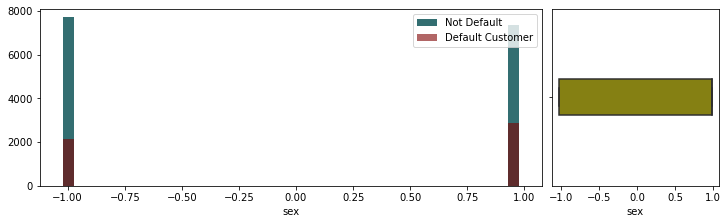

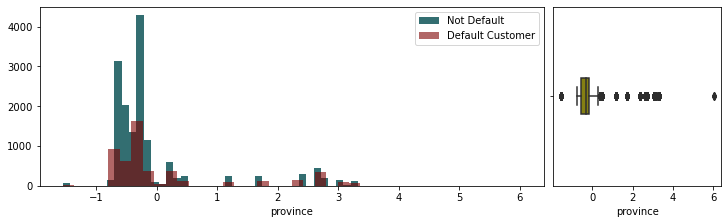

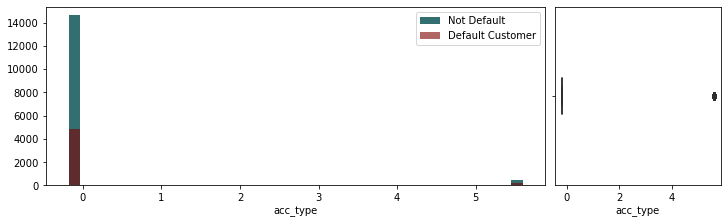

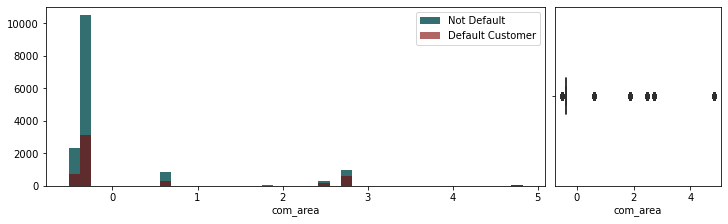

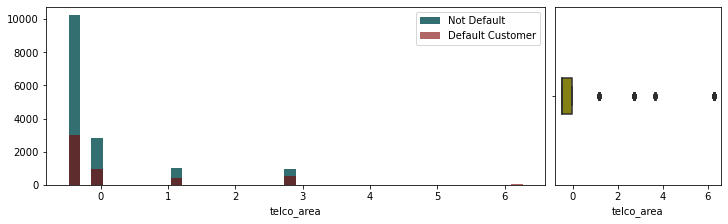

In [107]:
for i in cat:
    plots(i, a)